# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Galih Purnomo Putro
- **Email:** Kuromonobo@gmail.com
- **ID Dicoding:** galih_purnomo

## Menentukan Pertanyaan Bisnis

 Pertanyaan Bisnis?

1. Bagaimanakah  Pola Jam Penyewaan/Peminjaman Sepeda?
2. Bagaimana pola penyewaan sepeda berdasarkan jam di hari kerja maupun di libur?
3. Bagaimana Jumlah  Penyewaan berdasarkan Musim?
4. Adakah Hubungan Antara Suhu dengan Jumlah Penyewaan ?
5. Bagaimana Pola Penyewaan Berdasarkan Bulan?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#mengambil data day dari repository di github
day_df = pd.read_csv('https://raw.githubusercontent.com/kuromonobro/Submission_Dicoding/main/Data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#mengambil data hour dari repository di github
hour_df = pd.read_csv('https://raw.githubusercontent.com/kuromonobro/Submission_Dicoding/main/Data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data
    Menilai masing-masing dataframe dengan tehnik :
    info: df.info(); Missing Value:df.Isnull().sum(); Duplicate Value: df.duplicated().sum()); Deskripsi data: df.describe()

In [4]:
day_df.info()
#data sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()
#data sesuai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.isnull().sum()
#data tidak ada yang null

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isnull().sum()
#data tidak ada yang null

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
day_df.duplicated().sum()
#tidak ada duplikasi data

0

In [9]:
hour_df.duplicated().sum()
#tidak ada duplikasi data

0

In [10]:
day_df.describe()
#tidak ada masalah atau keanehan data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.describe()
#tidak ada masalah atau keanehan data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

   karena data pada pada dua data frame sama maka untuk selanjutnya menggunakan data hour_df. karena data tersebut masih menggunakan nama header kolom yang kurang sesuai maka saya ubah.

In [12]:
# Mengubah nama judul kolom
hour_df.rename(columns={
    'dteday': 'dateday',
    'hr': 'hour',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'atemp': 'temperature',
    'hum': 'humidity',
    'cnt': 'count'
    }, inplace=True)
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       17379 non-null  int64  
 1   dateday       17379 non-null  object 
 2   season        17379 non-null  int64  
 3   year          17379 non-null  int64  
 4   month         17379 non-null  int64  
 5   hour          17379 non-null  int64  
 6   holiday       17379 non-null  int64  
 7   weekday       17379 non-null  int64  
 8   workingday    17379 non-null  int64  
 9   weather_cond  17379 non-null  int64  
 10  temp          17379 non-null  float64
 11  temperature   17379 non-null  float64
 12  humidity      17379 non-null  float64
 13  windspeed     17379 non-null  float64
 14  casual        17379 non-null  int64  
 15  registered    17379 non-null  int64  
 16  count         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melakukan pengubahan data dateday sesuai dengan typenya

In [14]:
hour_df['dateday'] = pd.to_datetime(hour_df.dateday)
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   year          17379 non-null  int64         
 4   month         17379 non-null  int64         
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   weekday       17379 non-null  int64         
 8   workingday    17379 non-null  int64         
 9   weather_cond  17379 non-null  int64         
 10  temp          17379 non-null  float64       
 11  temperature   17379 non-null  float64       
 12  humidity      17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

Mengubah isian data yang sebelumnya angka menjadi keterangan yang bisa lebih dipahami  

In [15]:
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
    })
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
    })
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
    })
hour_df['weather_cond'] = hour_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
    })
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  object        
 3   year          17379 non-null  int64         
 4   month         17379 non-null  object        
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   weekday       17379 non-null  object        
 8   workingday    17379 non-null  int64         
 9   weather_cond  17379 non-null  object        
 10  temp          17379 non-null  float64       
 11  temperature   17379 non-null  float64       
 12  humidity      17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

Kemudian mengubah type data yang diperlukan ke  data kategorikal

In [17]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather_cond'] = hour_df.weather_cond.astype('category')
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,temperature,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


Cek kembali data yang ada, data yang ada sudah sesuai

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  category      
 4   month         17379 non-null  category      
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weather_cond  17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  temperature   17379 non-null  float64       
 12  humidity      17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

## Exploratory Data Analysis (EDA)

      Eksplorasi data penyewaan pada tiap jam

In [19]:
hour_df.groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                        
       max min        mean     sum
hour                              
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
3       79   1   11.727403    8174
4       28   1    6.352941    4428
5       66   1   19.889819   14261
6      213   1   76.044138   55132
7      596   1  212.064649  154171
8      839   5  359.011004  261001
9      426  14  219.309491  159438
10     539   8  173.668501  126257
11     663  10  208.143054  151320
12     776   3  253.315934  184414
13     760  11  253.661180  184919
14     750  12  240.949246  175652
15     750   7  251.233196  183149
16     783  11  311.983562  227748
17     976  15  461.452055  336860
18     977  23  425.510989  309772
19     743  11  311.523352  226789
20     567  11  226.030220  164550
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941

In [24]:
hourly_pattern = hour_df.groupby('hour')['count'].mean().reset_index()
print(hourly_pattern)

    hour       count
0      0   53.898072
1      1   33.375691
2      2   22.869930
3      3   11.727403
4      4    6.352941
5      5   19.889819
6      6   76.044138
7      7  212.064649
8      8  359.011004
9      9  219.309491
10    10  173.668501
11    11  208.143054
12    12  253.315934
13    13  253.661180
14    14  240.949246
15    15  251.233196
16    16  311.983562
17    17  461.452055
18    18  425.510989
19    19  311.523352
20    20  226.030220
21    21  172.314560
22    22  131.335165
23    23   87.831044


    ekplorasi data penyewaan tiap hari

In [61]:
hour_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\k\AppData\Local\Temp\ipykernel_1852\3580375670.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='weekday').agg({


count                        
          max min        mean     sum
weekday                              
Fri       957   1  196.135907  487790
Mon       968   1  183.744655  455503
Sat       783   1  190.209793  477807
Sun       776   1  177.468825  444027
Thu       976   1  196.436665  485395
Tue       970   1  191.238891  469109
Wed       977   1  191.130505  473048

Kita coba bandingkan dengan workday, dan holidays serta menambahkan jumlah dibawah agar lebih jelas perbedaanya

In [29]:
hourly_workingday = hour_df.groupby(['hour', 'workingday'])['count'].mean().reset_index()

hourly_pivot = hourly_workingday.pivot(
    index='hour',
    columns='workingday',
    values='count'
).reset_index()

hourly_pivot.columns = ['Hour', 'Holiday', 'Working Day']

total_sum = {
    'Hour': 'Total',
    'Holiday': hourly_pivot['Holiday'].sum(),
    'Working Day': hourly_pivot['Working Day'].sum()
}

hourly_pivot = pd.concat([hourly_pivot, pd.DataFrame([total_sum])], ignore_index=True)

print(hourly_pivot)

     Hour      Holiday  Working Day
0       0    90.800000    36.786290
1       1    69.508696    16.552632
2       2    53.171053     8.683778
3       3    25.775330     4.942553
4       4     8.264317     5.429787
5       5     8.689189    24.913131
6       6    18.742358   102.500000
7       7    43.406926   290.612903
8       8   105.653680   477.006048
9       9   171.623377   241.518145
10     10   255.909091   135.366935
11     11   315.316017   158.229839
12     12   366.259740   200.820926
13     13   372.731602   198.429719
14     14   364.645022   183.572289
15     15   358.813853   201.331325
16     16   352.727273   293.122244
17     17   323.549784   525.290581
18     18   281.056522   492.226908
19     19   231.673913   348.401606
20     20   174.739130   249.718876
21     21   142.060870   186.287149
22     22   116.060870   138.389558
23     23    85.930435    88.708835
24  Total  4337.109046  4608.842059


C:\Users\k\AppData\Local\Temp\ipykernel_1852\283634706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_workingday = hour_df.groupby(['hour', 'workingday'])['count'].mean().reset_index()


eksplorasi data berdasarkan musim

In [67]:
seasonal_pattern = hour_df.groupby('season')['count'].mean().reset_index()
print(seasonal_pattern)

   season       count
0    Fall  236.016237
1  Spring  111.114569
2  Summer  208.344069
3  Winter  198.868856


C:\Users\k\AppData\Local\Temp\ipykernel_1852\1494451338.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_pattern = hour_df.groupby('season')['count'].mean().reset_index()


eksplorasi data berdasarkan musim dan bulan 

In [94]:
season_month_pattern = hour_df.groupby(['season', 'month'])['count'].mean().reset_index()
print(season_month_pattern)

    season month       count
0     Fall   Apr         NaN
1     Fall   Aug  238.097627
2     Fall   Dec         NaN
3     Fall   Feb         NaN
4     Fall   Jan         NaN
5     Fall   Jul  231.819892
6     Fall   Jun  240.391667
7     Fall   Mar         NaN
8     Fall   May         NaN
9     Fall   Nov         NaN
10    Fall   Oct         NaN
11    Fall   Sep  237.036087
12  Spring   Apr         NaN
13  Spring   Aug         NaN
14  Spring   Dec   82.214149
15  Spring   Feb  112.865026
16  Spring   Jan   94.424773
17  Spring   Jul         NaN
18  Spring   Jun         NaN
19  Spring   Mar  149.699684
20  Spring   May         NaN
21  Spring   Nov         NaN
22  Spring   Oct         NaN
23  Spring   Sep         NaN
24  Summer   Apr  187.260960
25  Summer   Aug         NaN
26  Summer   Dec         NaN
27  Summer   Feb         NaN
28  Summer   Jan         NaN
29  Summer   Jul         NaN
30  Summer   Jun  240.577083
31  Summer   Mar  165.753817
32  Summer   May  222.907258
33  Summer   N

C:\Users\k\AppData\Local\Temp\ipykernel_1852\4222284887.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_month_pattern = hour_df.groupby(['season', 'month'])['count'].mean().reset_index()


Eksplorasi Hubungan Suhu dengan Jumlah penyewaan

In [75]:
correlation = hour_df['count'].corr(hour_df['temperature'])
print(f"Korelasi antara jumlah penyewaan dan suhu: {correlation:.2f}")

Korelasi antara jumlah penyewaan dan suhu: 0.40


Eksplorasi Penyewaan Tiap Bulan

In [79]:
monthly_pattern = hour_df.groupby('month')['count'].mean().reset_index()
print(monthly_pattern)

   month       count
0    Apr  187.260960
1    Aug  238.097627
2    Dec  142.303439
3    Feb  112.865026
4    Jan   94.424773
5    Jul  231.819892
6    Jun  240.515278
7    Mar  155.410726
8    May  222.907258
9    Nov  177.335421
10   Oct  222.158511
11   Sep  240.773138


C:\Users\k\AppData\Local\Temp\ipykernel_1852\3748912893.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_pattern = hour_df.groupby('month')['count'].mean().reset_index()


## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana Pola Penyewaan Berdasarkan Jam?

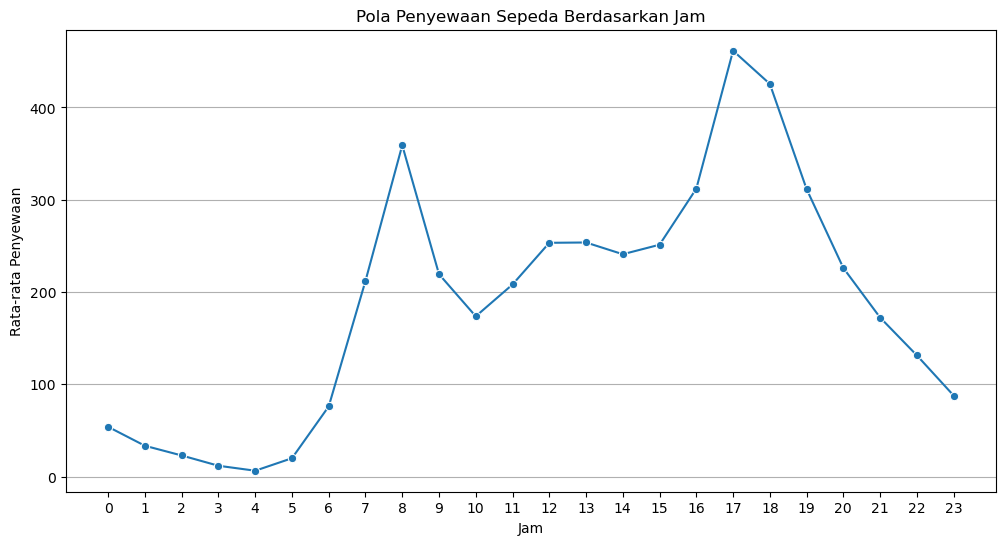

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pattern, x='hour', y='count', marker='o')
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))  # Menampilkan semua jam dari 0-23
plt.grid(axis='y')
plt.show()

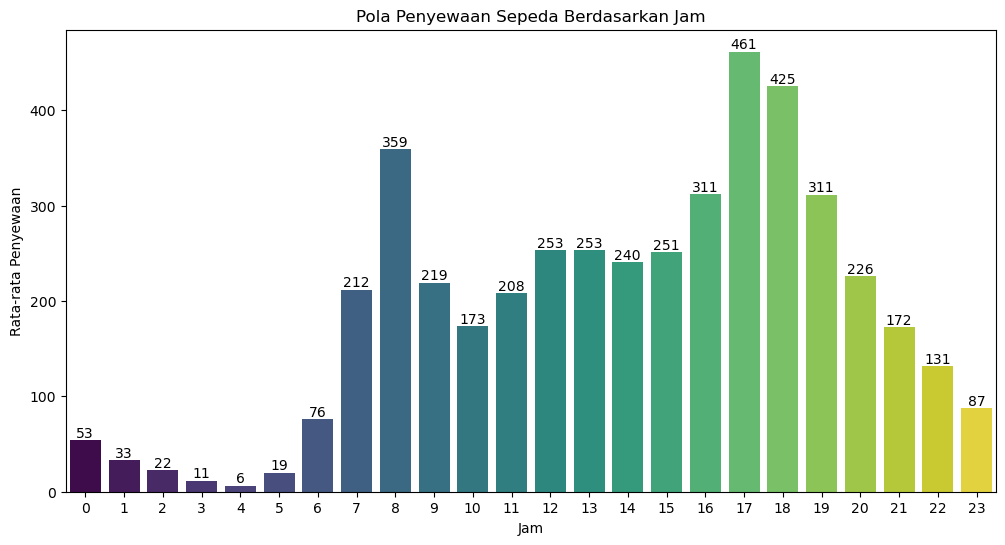

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=hourly_pattern, x='hour', y='count', hue='hour', palette='viridis', legend=False)

# Menambahkan label data pada puncak
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.show()


**Insight:**
Dari Pola tersebut terjadi kenaikan penyewaan mulai pukul 5 dan puncaknya pada pukul pagi pukul 8.00 dan sore mulai  17.00 

### Pertanyaan 2:Bagaimana Pola Penyewaan Sepeda Berdasarkan Jam (Hari Kerja dibandingkan hari Libur)?

In [ ]:
membuat grafik perbandingan penyewaan Sepeda Berdasarkan Jam (Hari Kerja dibandingkan hari Libur)

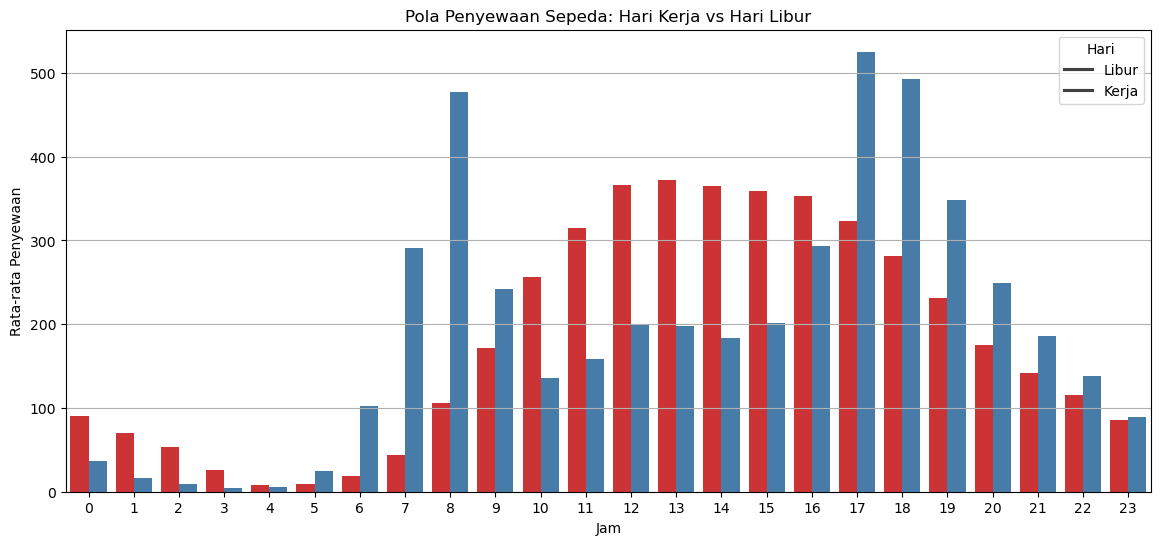

In [43]:
plt.figure(figsize=(14, 6))
sns.barplot(data=hourly_workingday, x='hour', y='count', hue='workingday', palette='Set1')
plt.title('Pola Penyewaan Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.legend(title='Hari', labels=['Libur', 'Kerja'])
plt.grid(axis='y')
plt.show()

**Insight:**
1. Dari grafik terlihat bahwa penyewaan terbesar tetap terjadi di hari kerja dan puncaknya pada pukul 08 dan 17
2. pada hari libur terdapat kenaikan antara pukul 10 s.d. 16 dibandingkan pada hari kerja dan cenderung merata

### Pertanyaan 3:Jumlah Penyewaan Berdasarkan Musim?

Membuat bar chart 

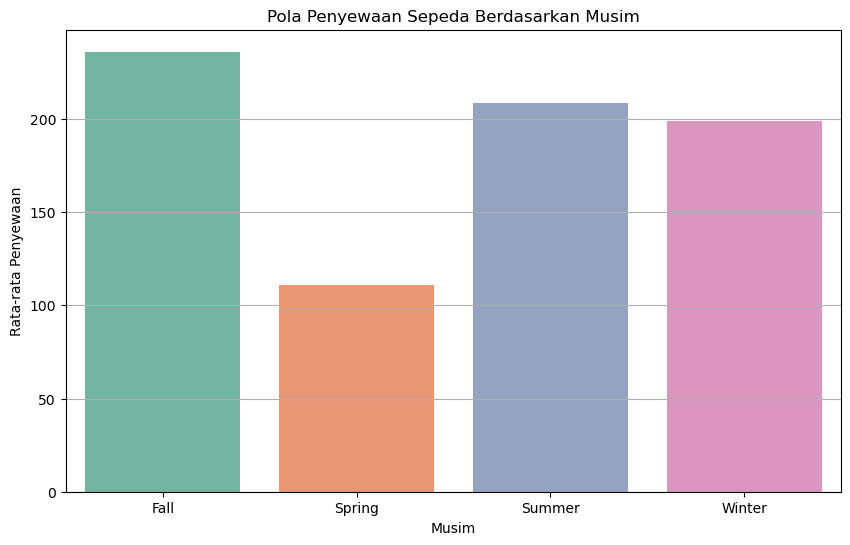

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_pattern, x='season', y='count', hue='season',palette='Set2')
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y')
plt.show()

**Insight**
1. Musim panas memiliki jumlah penyewaan tertinggi.
2. Musim dingin memiliki jumlah penyewaan terendah.

### Pertanyaan 4 :Adakah Hubungan Antara Suhu dengan Jumlah Penyewaan ?c

membuat scatter plot untuk melihat seberapa kuat korelasi

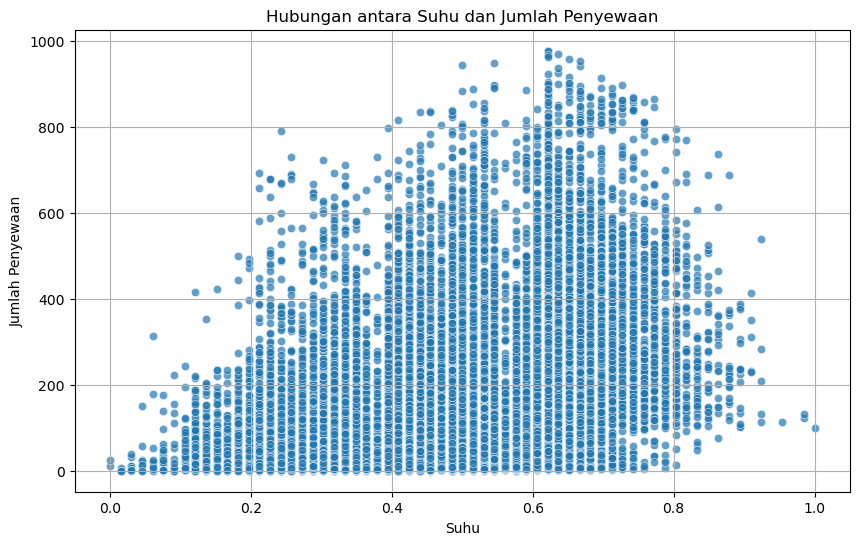

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_df, x='temperature', y='count', alpha=0.7)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.show()

**Insight**
terdapat Korelasi Positif antara kenaikan suhu dengan jumlah penyewaan, jadi ketika suhu meningkat ada kenaikan penyewaan namun ketika suhu terlalu tinggi ada penurunan penyewaan

### Pertanyaan 5 : Bagaimana Pola Penyewaan Berdasarkan Bulan?

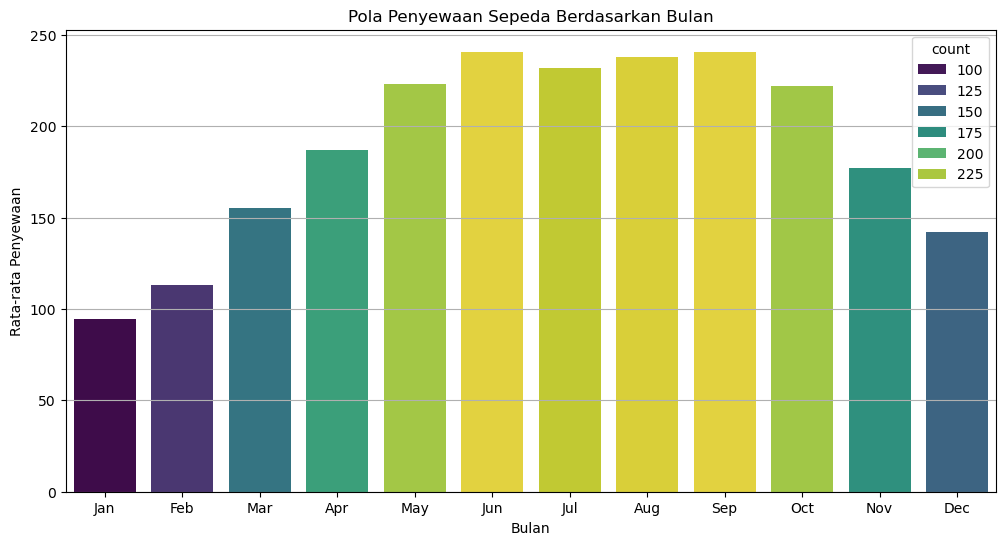

In [93]:
order_of_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_pattern = monthly_pattern.set_index('month').loc[order_of_months].reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_pattern, x='month', y='count', order=order_of_months, hue='count',palette='viridis')
plt.title('Pola Penyewaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.grid(axis='y')
plt.show()

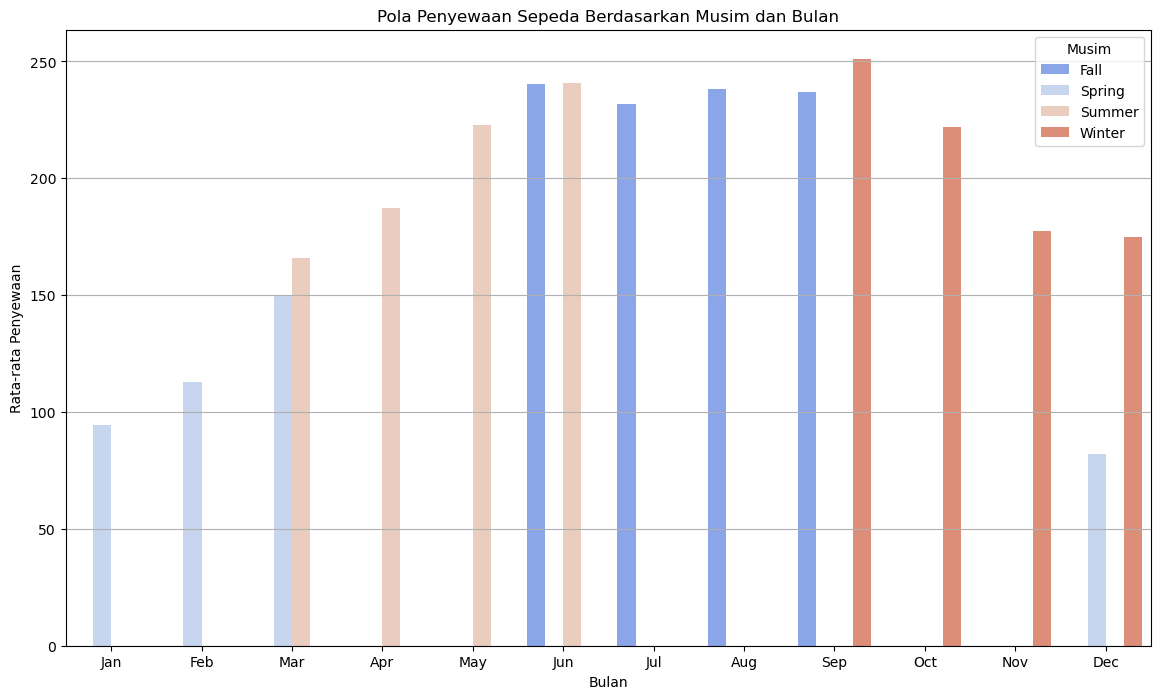

In [97]:
order_of_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

season_month_pattern['month'] = pd.Categorical(season_month_pattern['month'], categories=order_of_months, ordered=True)
season_month_pattern = season_month_pattern.sort_values('month')

plt.figure(figsize=(14, 8))
sns.barplot(
    data=season_month_pattern, 
    x='month', 
    y='count', 
    hue='season', 
    palette='coolwarm'
)
plt.title('Pola Penyewaan Sepeda Berdasarkan Musim dan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Musim')
plt.grid(axis='y')
plt.show()


**Insight**
1. Bulan April Sampai Oktober Jumlah penyewaan Tinggi
2. Bulan Desember dan Januari memiliki jumlah penyewaan terendah
3. hal ini berkaitan dengan musim juga dimana ketika musim dengan suhu hangat akan meningkatkan penyewaan

### Conclusion

1. -kenaikan penyewaan mulai pukul 5 dan puncaknya pada pukul pagi pukul 8.00 dan sore mulai  17.00 
2. Puncak penyewaan ataupun  intensitas penyewaan tertinggi  terjadi pada jam berangkat kerja(pagi ) dan pulang kerja (sore) di hari kerja. Pada hari libur penyewaan merata dari pagi sampai sore hari.
3.  Musim dengan suhu hangat meningkatkan jumlah penyewaan dan terdapat  Korelasi positif  antara suhu dan penyewaan. Namun apabila suhu terlalu tinggi maka terjadi penurunan penyewaan.
4.  tentunya pada bulan-bulan yang mempunyai suhu hangat akan meningkat jumlah penyewaan sepeda.